In [21]:
import pandas as pd

# Leer el archivo CSV limpio
df_clean = pd.read_csv('C:/Users/sergi/Proyectos/Proyecto_Final/data/processed/vehicles_clean.csv',quotechar='"')

# Mostrar las primeras filas del DataFrame
print(df_clean.head())

   region  price    year manufacturer                     model  condition  \
0  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt       good   
1  auburn  22590  2010.0    chevrolet            silverado 1500       good   
2  auburn  39590  2020.0    chevrolet       silverado 1500 crew       good   
3  auburn  30990  2017.0       toyota      tundra double cab sr       good   
4  auburn  15000  2013.0         ford                 f-150 xlt  excellent   

  fuel  odometer transmission drive       size    type paint_color state  \
0  gas   57923.0        other   4wd        NaN  pickup       white    al   
1  gas   71229.0        other   4wd  full-size  pickup        blue    al   
2  gas   19160.0        other   4wd        NaN  pickup         red    al   
3  gas   41124.0        other   4wd  full-size  pickup         red    al   
4  gas  128000.0    automatic   rwd  full-size   truck       black    al   

      lat     long  
0  32.590 -85.4800  
1  32.590 -85.4800  
2  32.590 -

C:\Users\sergi\AppData\Local\Temp\ipykernel_9788\2178461404.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regiones['region'] = pd.Categorical(df_regiones['region'], categories=regiones_top, ordered=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_9788\2178461404.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manu['manufacturer'] = pd.Categorical(df_manu['manufacturer'], categories=manufacturer_top, ordered=True)


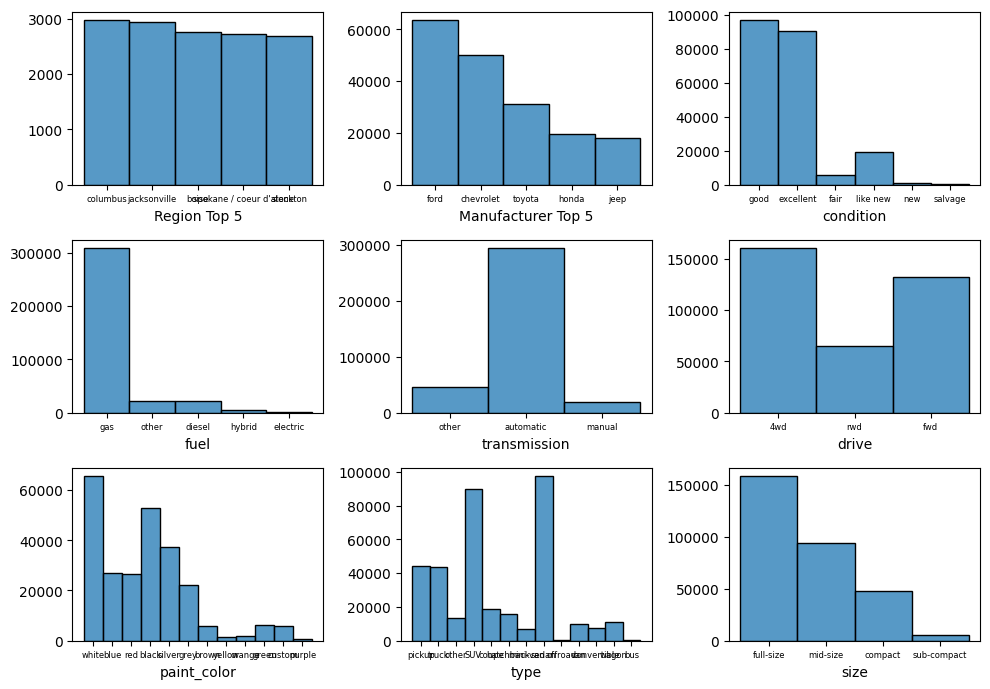

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular la frecuencia de cada región y seleccionar las 10 primeras
regiones_top = df_clean['region'].value_counts().nlargest(5).index
manufacturer_top = df_clean['manufacturer'].value_counts().nlargest(5).index


# Filtrar el DataFrame original para incluir solo estas 10 regiones y ordenarlas
df_regiones = df_clean[df_clean['region'].isin(regiones_top)]
df_regiones['region'] = pd.Categorical(df_regiones['region'], categories=regiones_top, ordered=True)
df_manu = df_clean[df_clean['manufacturer'].isin(manufacturer_top)]
df_manu['manufacturer'] = pd.Categorical(df_manu['manufacturer'], categories=manufacturer_top, ordered=True)

fig, axis = plt.subplots(3, 3, figsize=(10, 7))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=df_regiones, x="region").set(ylabel=None, xlabel = "Region Top 5")
sns.histplot(ax=axis[0, 1], data=df_manu, x="manufacturer").set(ylabel=None, xlabel = "Manufacturer Top 5")
sns.histplot(ax=axis[0, 2], data=df_clean, x="condition").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df_clean, x="fuel").set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=df_clean, x="transmission").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df_clean, x="drive").set(ylabel=None)
sns.histplot(ax=axis[2, 0], data=df_clean, x="paint_color").set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=df_clean, x="type").set(ylabel=None)
sns.histplot(ax=axis[2, 2], data=df_clean, x="size").set(ylabel=None)

# Ajustar el tamaño de la letra de la leyenda en el eje x
for i, ax in enumerate(axis.flat):
        ax.tick_params(axis='x', labelsize=6)  # Cambia el valor de 'labelsize' según necesites

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


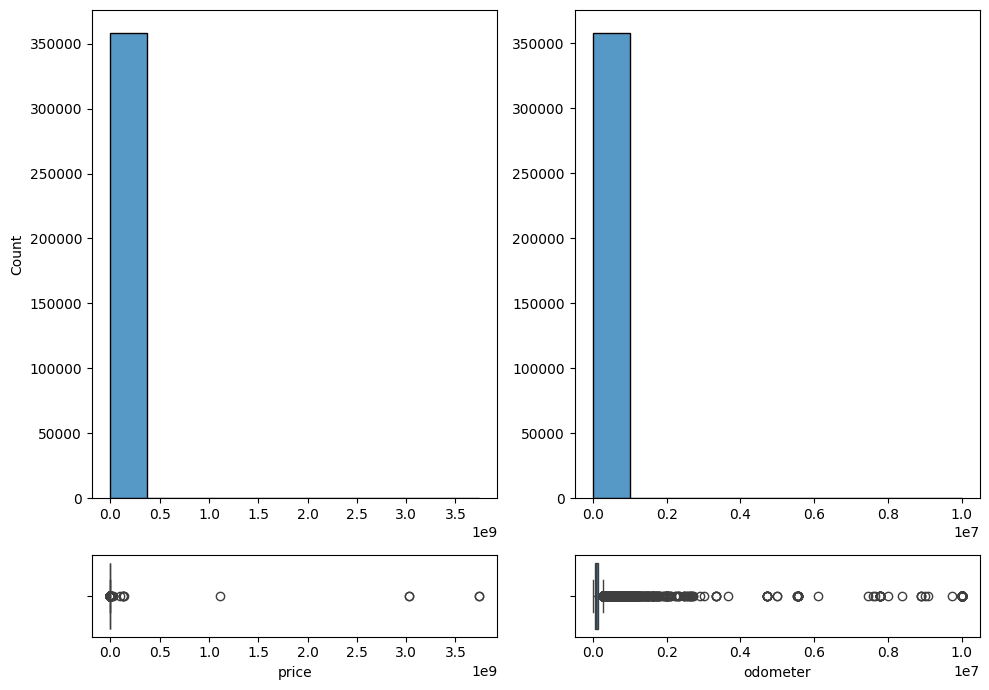

In [23]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_clean, x = "price", bins = 10).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_clean, x = "price")
sns.histplot(ax = axis[0, 1], data = df_clean, x = "odometer", bins = 10).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_clean, x = "odometer")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


In [24]:
print(df_clean[df_clean['price'] > 500000])

                         region       price    year   manufacturer  \
1496                     dothan    99999999  1993.0           ford   
24812           humboldt county  1111111111  1999.0           ford   
58032            ventura county     2000000  2002.0         saturn   
66598   fort collins / north CO      655000  2010.0       chrysler   
76822                  delaware  3024942282  2000.0  mercedes-benz   
79783     ft myers / SW florida      990000  2017.0  mercedes-benz   
88827                   orlando     6995495  2014.0          dodge   
114600  spokane / coeur d'alene    17000000  2007.0            ram   
115767  spokane / coeur d'alene   123456789  1999.0          buick   
125919              bloomington      566567  2006.0       chrysler   
130541              terre haute     1234567  2006.0           jeep   
162962                ann arbor   123456789  2015.0      chevrolet   
163433                ann arbor     1234567  2010.0        lincoln   
180818    minneapoli

In [25]:
# Eliminar outliers del df_clean
df_clean = df_clean[df_clean['price'] <= 200000]
df_clean = df_clean[df_clean['odometer'] <= 250000]

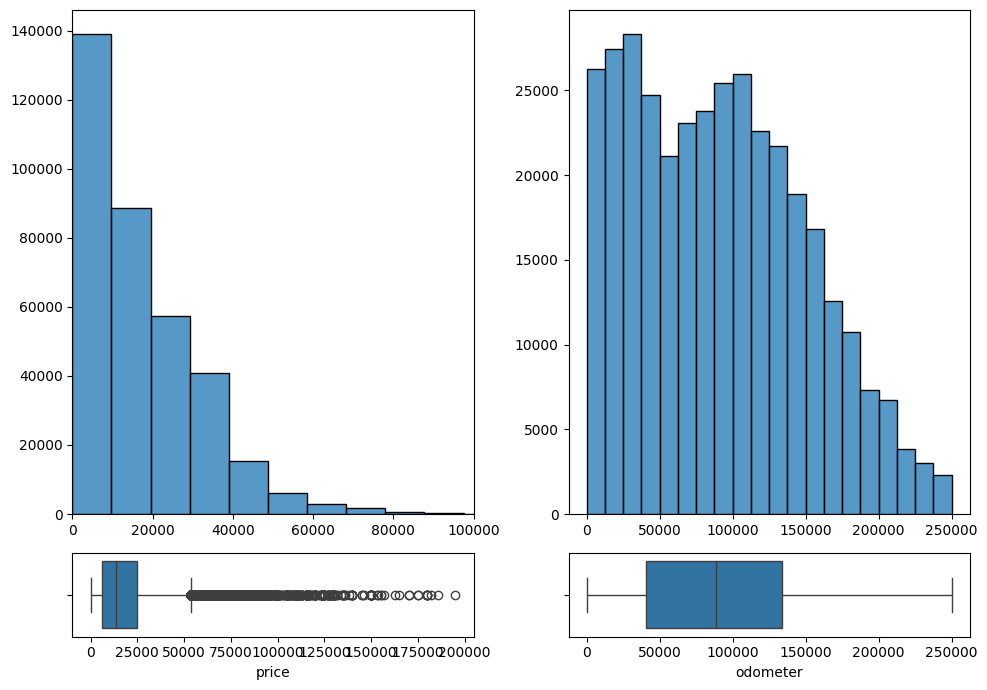

In [26]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_clean, x = "price", bins = 20).set(xlabel = None, ylabel = None)
axis[0, 0].set_xlim(0, 100000)
sns.boxplot(ax = axis[1, 0], data = df_clean, x = "price")
sns.histplot(ax = axis[0, 1], data = df_clean, x = "odometer", bins = 20).set(xlabel = None, ylabel = None)
axis[0, 0].set_xlim(0, 100000)
sns.boxplot(ax = axis[1, 1], data = df_clean, x = "odometer")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

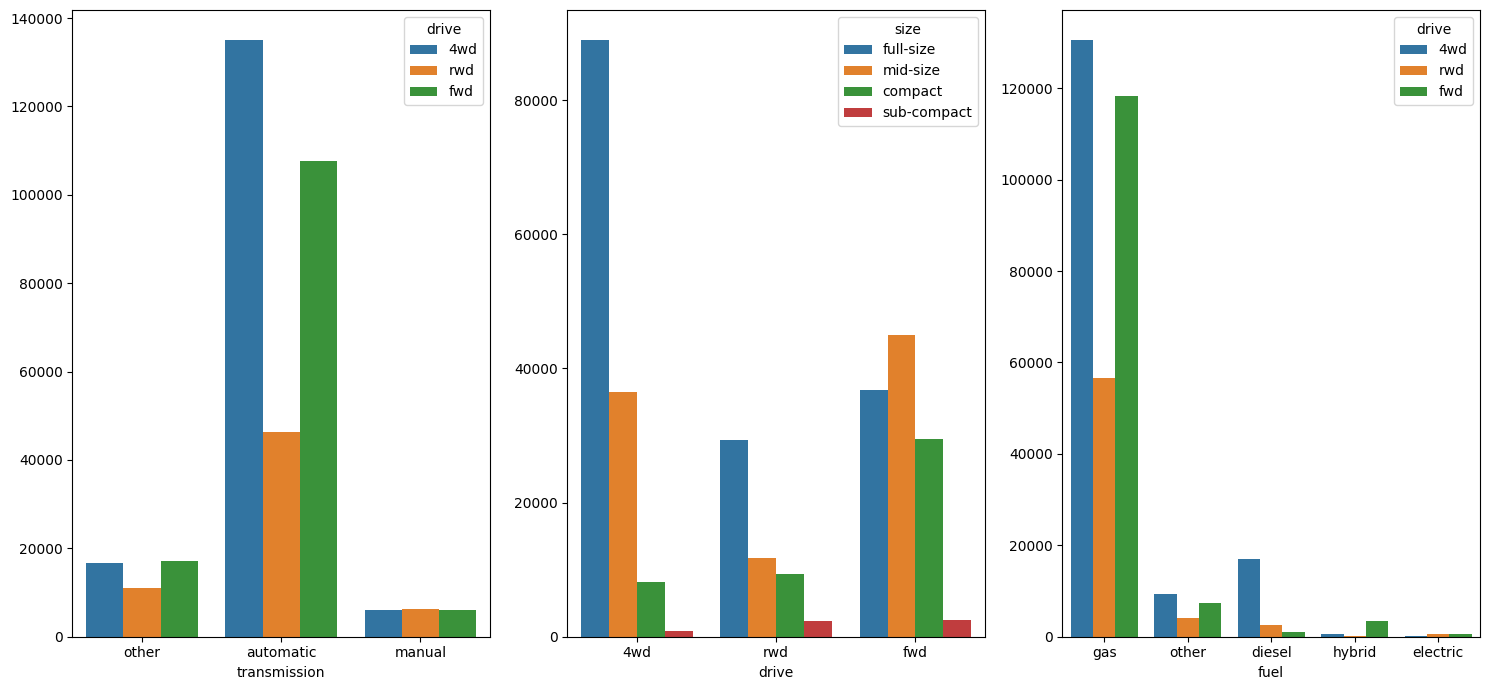

In [27]:
# Análisis categórico-categórico

fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.countplot(ax = axis[0], data = df_clean, x = "transmission", hue = "drive").set(ylabel = None)
sns.countplot(ax = axis[1], data = df_clean, x = "drive", hue = "size").set(ylabel = None)
sns.countplot(ax = axis[2], data = df_clean, x = "fuel", hue = "drive").set(ylabel = None)

plt.tight_layout()
plt.show()

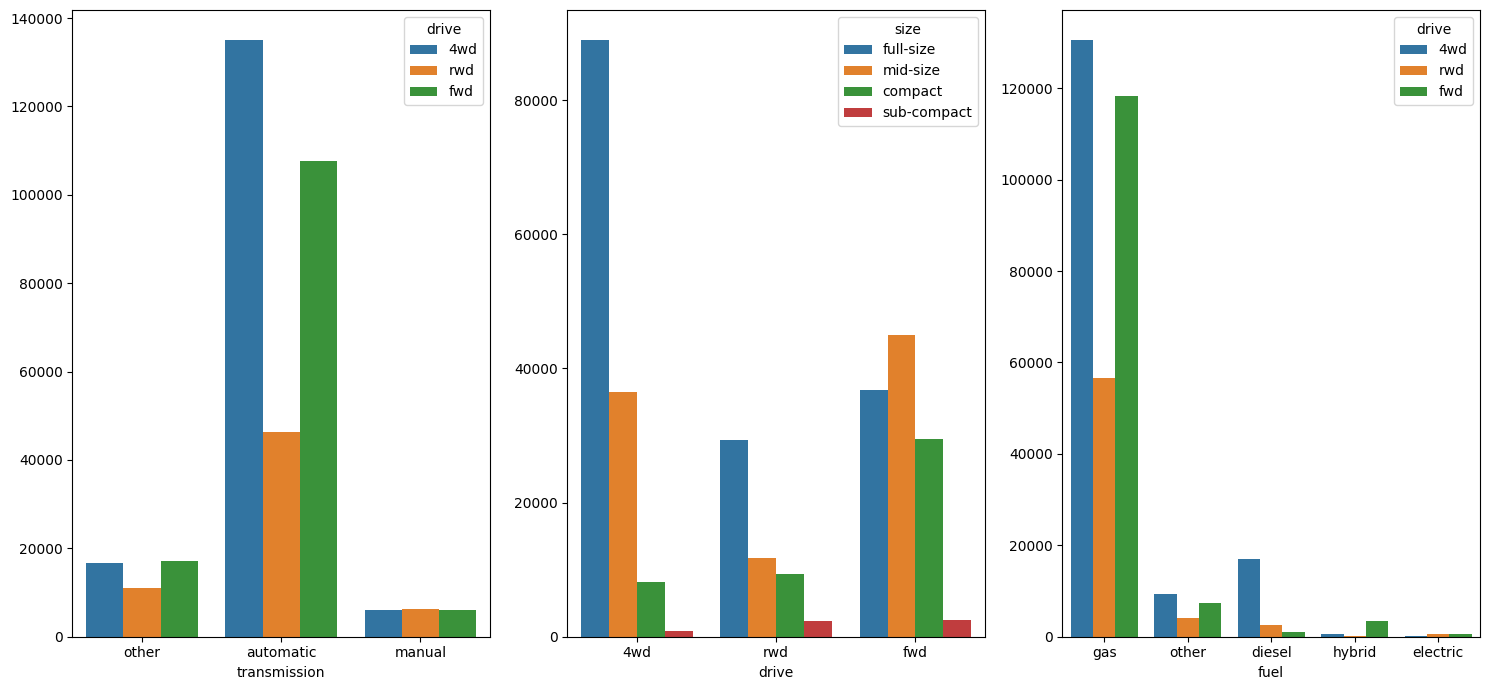

In [28]:
# Análisis categórico-categórico

fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.countplot(ax = axis[0], data = df_clean, x = "transmission", hue = "drive").set(ylabel = None)
sns.countplot(ax = axis[1], data = df_clean, x = "drive", hue = "size").set(ylabel = None)
sns.countplot(ax = axis[2], data = df_clean, x = "fuel", hue = "drive").set(ylabel = None)

plt.tight_layout()
plt.show()

In [29]:
import pandas as pd

# Agrupar los datos por estado y calcular los valores más comunes en cada grupo
state_stats = df_clean.groupby('state').agg({
    'manufacturer': lambda x: x.value_counts().index[0],
    'model': lambda x: x.value_counts().index[0],
    'fuel': lambda x: x.value_counts().index[0],
    'type': lambda x: x.value_counts().index[0],
    'size': lambda x: x.value_counts().index[0],
    'paint_color': lambda x: x.value_counts().index[0]
}).reset_index()

# Mostrar la tabla
print(state_stats)

state_stats.to_csv('C:/Users/sergi/Proyectos/Proyecto_Final/data/processed/state_stats.csv')


   state manufacturer                 model fuel    type       size  \
0     ak         ford                 f-150  gas     SUV  full-size   
1     al         ford                 f-150  gas   sedan  full-size   
2     ar    chevrolet        silverado 1500  gas     SUV  full-size   
3     az         ford                 f-150  gas   sedan  full-size   
4     ca         ford                 f-150  gas   sedan  full-size   
5     co         ford                 f-150  gas     SUV  full-size   
6     ct         ford              forester  gas   sedan  full-size   
7     dc         ford                 f-150  gas   sedan  full-size   
8     de         ford  super duty f-550 drw  gas   sedan  full-size   
9     fl         ford                 f-150  gas   sedan  full-size   
10    ga         ford                 f-150  gas   sedan  full-size   
11    hi       toyota                tacoma  gas   sedan  full-size   
12    ia    chevrolet                 f-150  gas     SUV  full-size   
13    

In [30]:
# Leer el archivo con los top de cada region
df_state = pd.read_csv('C:/Users/sergi/Proyectos/Proyecto_Final/data/processed/state_stats.csv',quotechar='"')


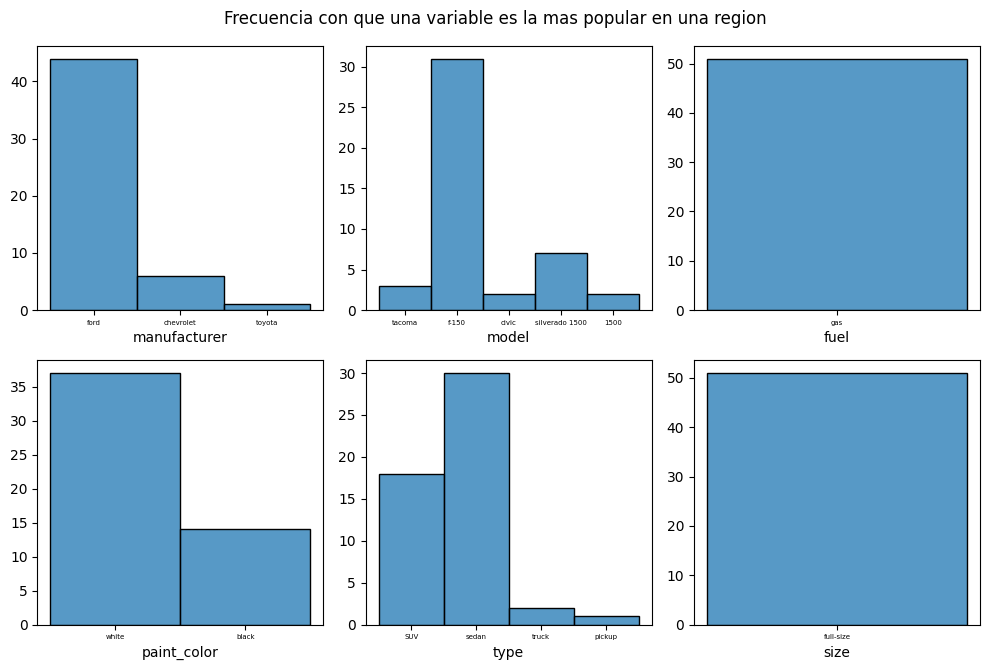

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar los datos por la columna manufacturer en df_region
df_state_sorted = df_state.sort_values(by='manufacturer', ascending=False)

# Filtrar los 5 modelos más populares
top_5_models = df_state_sorted['model'].value_counts().head(5).index
df_top_5_models = df_state_sorted[df_state_sorted['model'].isin(top_5_models)]

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=df_state, x="manufacturer").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=df_top_5_models, x="model").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=df_state, x="fuel").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df_state, x="paint_color").set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=df_state, x="type").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df_state, x="size").set(ylabel=None)

# Ajustar el tamaño de la letra de la leyenda en el eje x
for i, ax in enumerate(axis.flat):
        ax.tick_params(axis='x', labelsize=5)  # Cambia el valor de 'labelsize' según necesites

# Ajustar el layout con más espacio en la parte superior para el título
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Agregar un título para todo el grupo de gráficos
fig.suptitle("Frecuencia con que una variable es la mas popular en una region", fontsize=12)

# Mostrar el plot
plt.show()


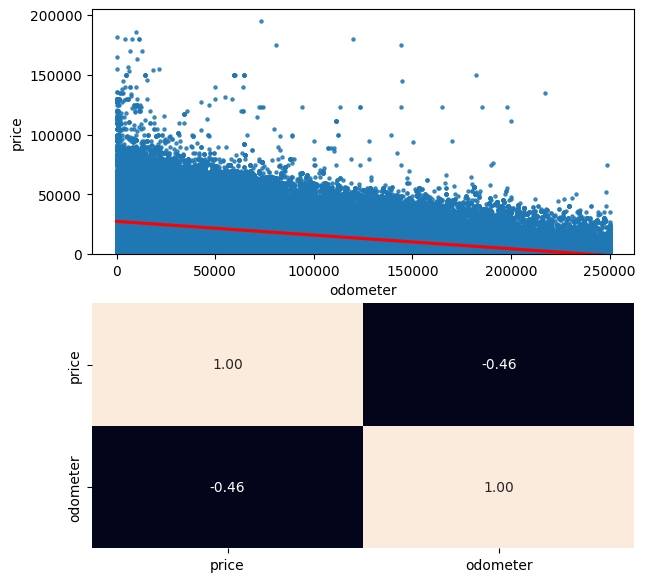

In [32]:
# Análisis numérico-numérico

fig, axis = plt.subplots(2,1, figsize = (7, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax=axis[0], data=df_clean, x="odometer", y="price", scatter_kws={'s': 5},line_kws={'color': 'red'})
sns.heatmap(df_clean[["price", "odometer"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)


# Ajustar el layout
axis[0].set_ylim(bottom=0)

# Mostrar el plot
plt.show()


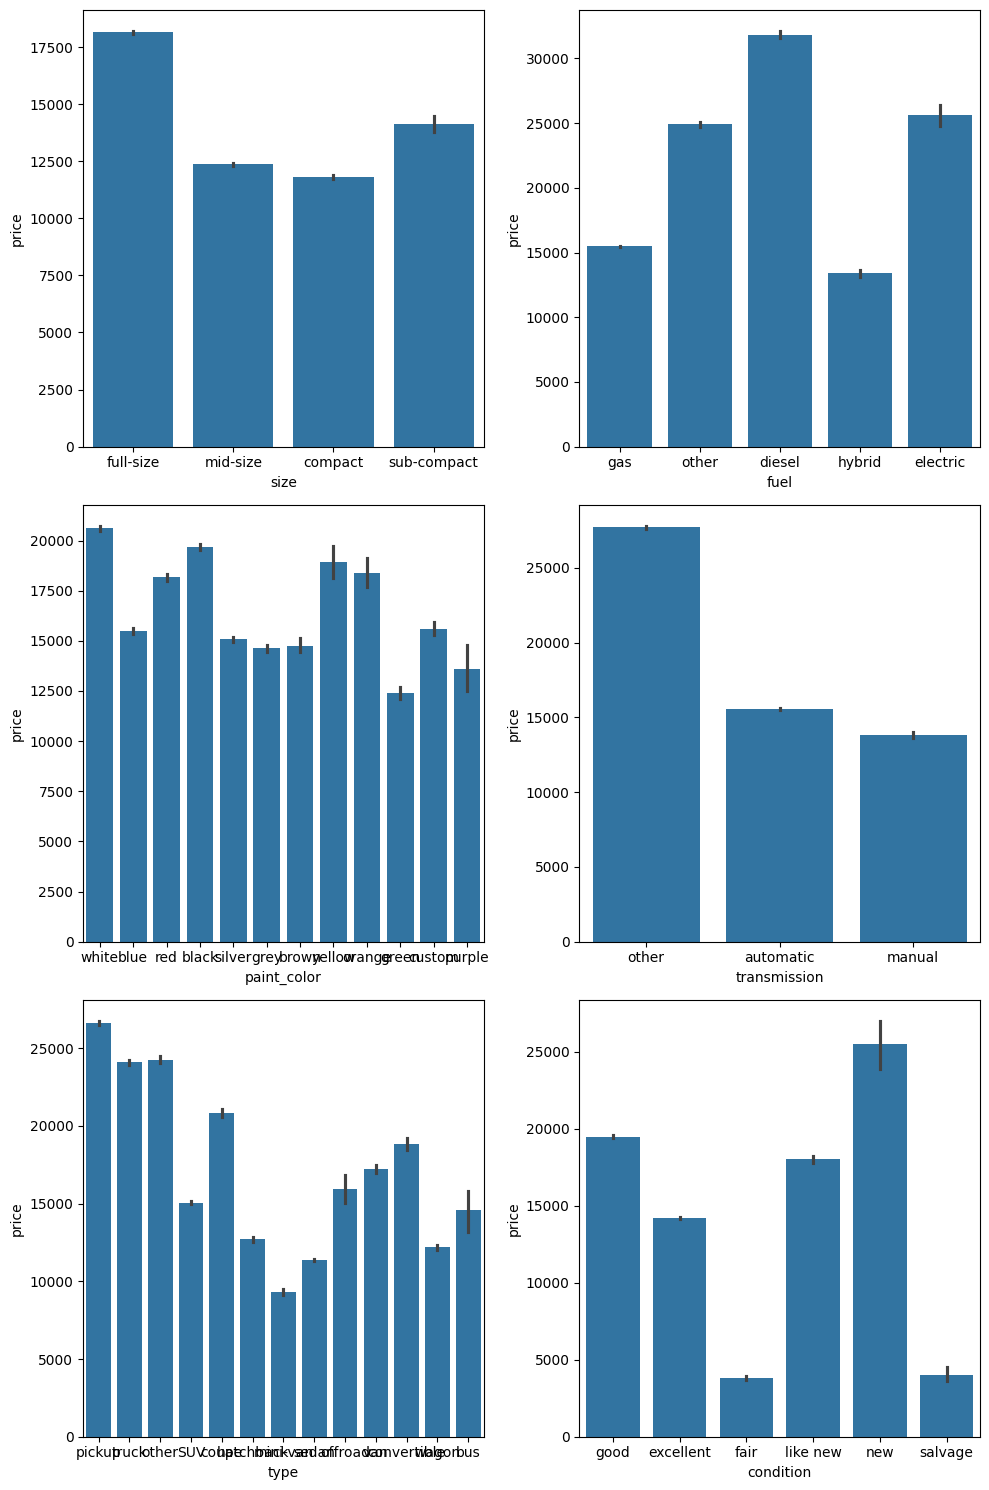

In [33]:
# Analisis Multivariable

fig, axis = plt.subplots(3, 2, figsize=(10, 15))

sns.barplot(ax=axis[0, 0], data=df_clean, x="size", y="price")
sns.barplot(ax=axis[0, 1], data=df_clean, x="fuel", y="price")
sns.barplot(ax=axis[1, 0], data=df_clean, x="paint_color", y="price")
sns.barplot(ax=axis[1, 1], data=df_clean, x="transmission", y="price")
sns.barplot(ax=axis[2, 0], data=df_clean, x="type", y="price")
sns.barplot(ax=axis[2, 1], data=df_clean, x="condition", y="price")

# Ajustar el layout
plt.tight_layout()

plt.show()


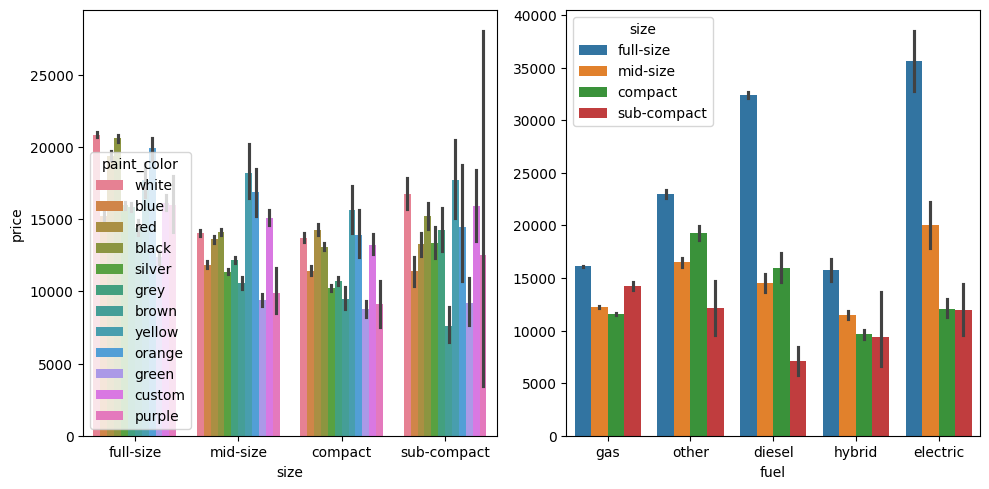

In [34]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = df_clean, x = "size", y = "price", hue = "paint_color")
sns.barplot(ax = axis[1], data = df_clean, x = "fuel", y = "price", hue = "size").set(ylabel = None)

plt.tight_layout()

plt.show()

In [35]:
# Factorizar columnas no numericas

columnas_nn = ('region', 'manufacturer', 'model', 'fuel', 'transmission', 'drive', 'size', 'type', 'paint_color', 'condition','state')

for col in columnas_nn:
    df_clean[col] = pd.factorize(df_clean[col])[0]

df_clean


region  price    year  manufacturer  model  condition  fuel  odometer  \
0            0  33590  2014.0             0      0          0     0   57923.0   
1            0  22590  2010.0             1      1          0     0   71229.0   
2            0  39590  2020.0             1      2          0     0   19160.0   
3            0  30990  2017.0             2      3          0     0   41124.0   
4            0  15000  2013.0             3      4          1     0  128000.0   
...        ...    ...     ...           ...    ...        ...   ...       ...   
357920     403  33590  2018.0            12   2211          0     0   30814.0   
357921     403  23590  2019.0             5    772          0     0   32226.0   
357922     403  30590  2020.0            14     44          0     0   12029.0   
357923     403  28990  2018.0            12    907          0     0   30112.0   
357924     403  30590  2019.0            23   3302          0     0   22716.0   

        transmission  drive  size  type  paint_color  state        lat  \
0                  0      0    -1     0            0      0  32.590000   
1                  0      0     0     0            1      0  32.590000   
2                  0      0    -1     0            2      0  32.590000   
3                  0      0     0     0            2      0  32.590000   
4                  1      1     0     1            3      0  32.592000   
...              ...    ...   ...   ...          ...    ...        ...   
357920             1      1     1     7            0     50  33.779214   
357921             0      2     0     7           -1     50  33.786500   
357922             0      2    -1     7            2     50  33.786500   
357923             0      2    -1     7            4     50  33.786500   
357924             0      1    -1     4           -1     50  33.779214   

             long  
0      -85.480000  
1      -85.480000  
2      -85.480000  
3      -85.480000  
4      -85.518900  
...           ...  
357920 -84.411811  
357921 -84.445400  
357922 -84.445400  
357923 -84.445400  
357924 -84.411811  

[352669 rows x 16 columns]

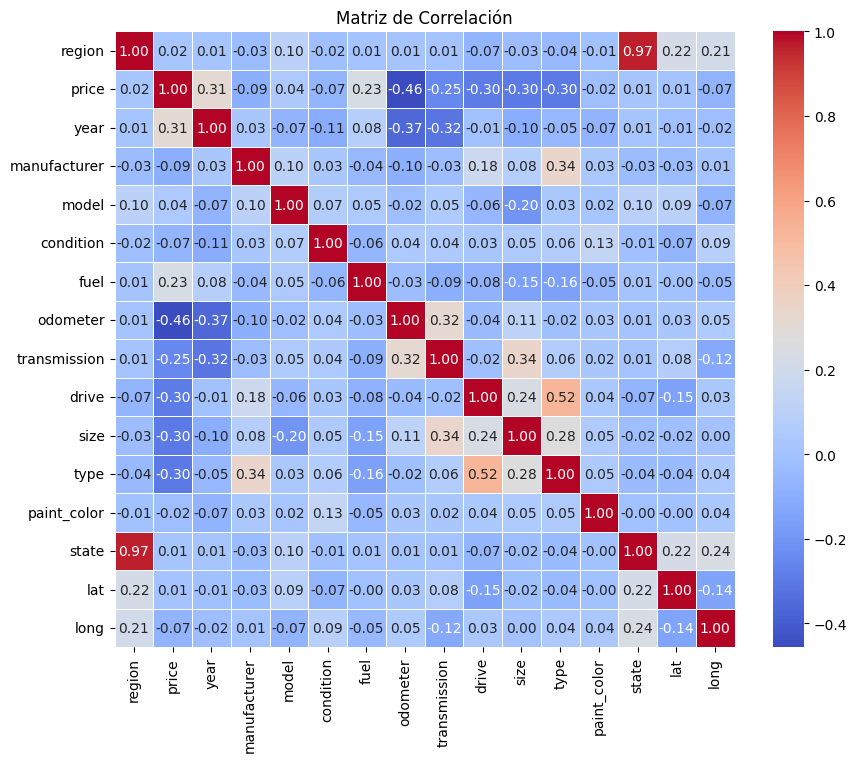

In [36]:
# Calcular la matriz de correlación
correlation_matrix = df_clean.corr()

# Crear y visualizar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

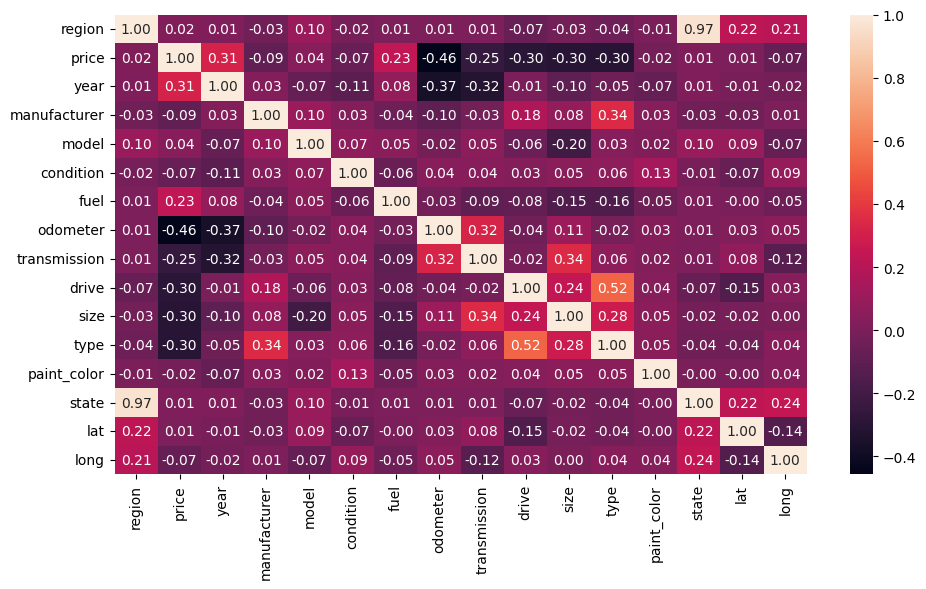

In [37]:
# Calcular Heatmap

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df_clean.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

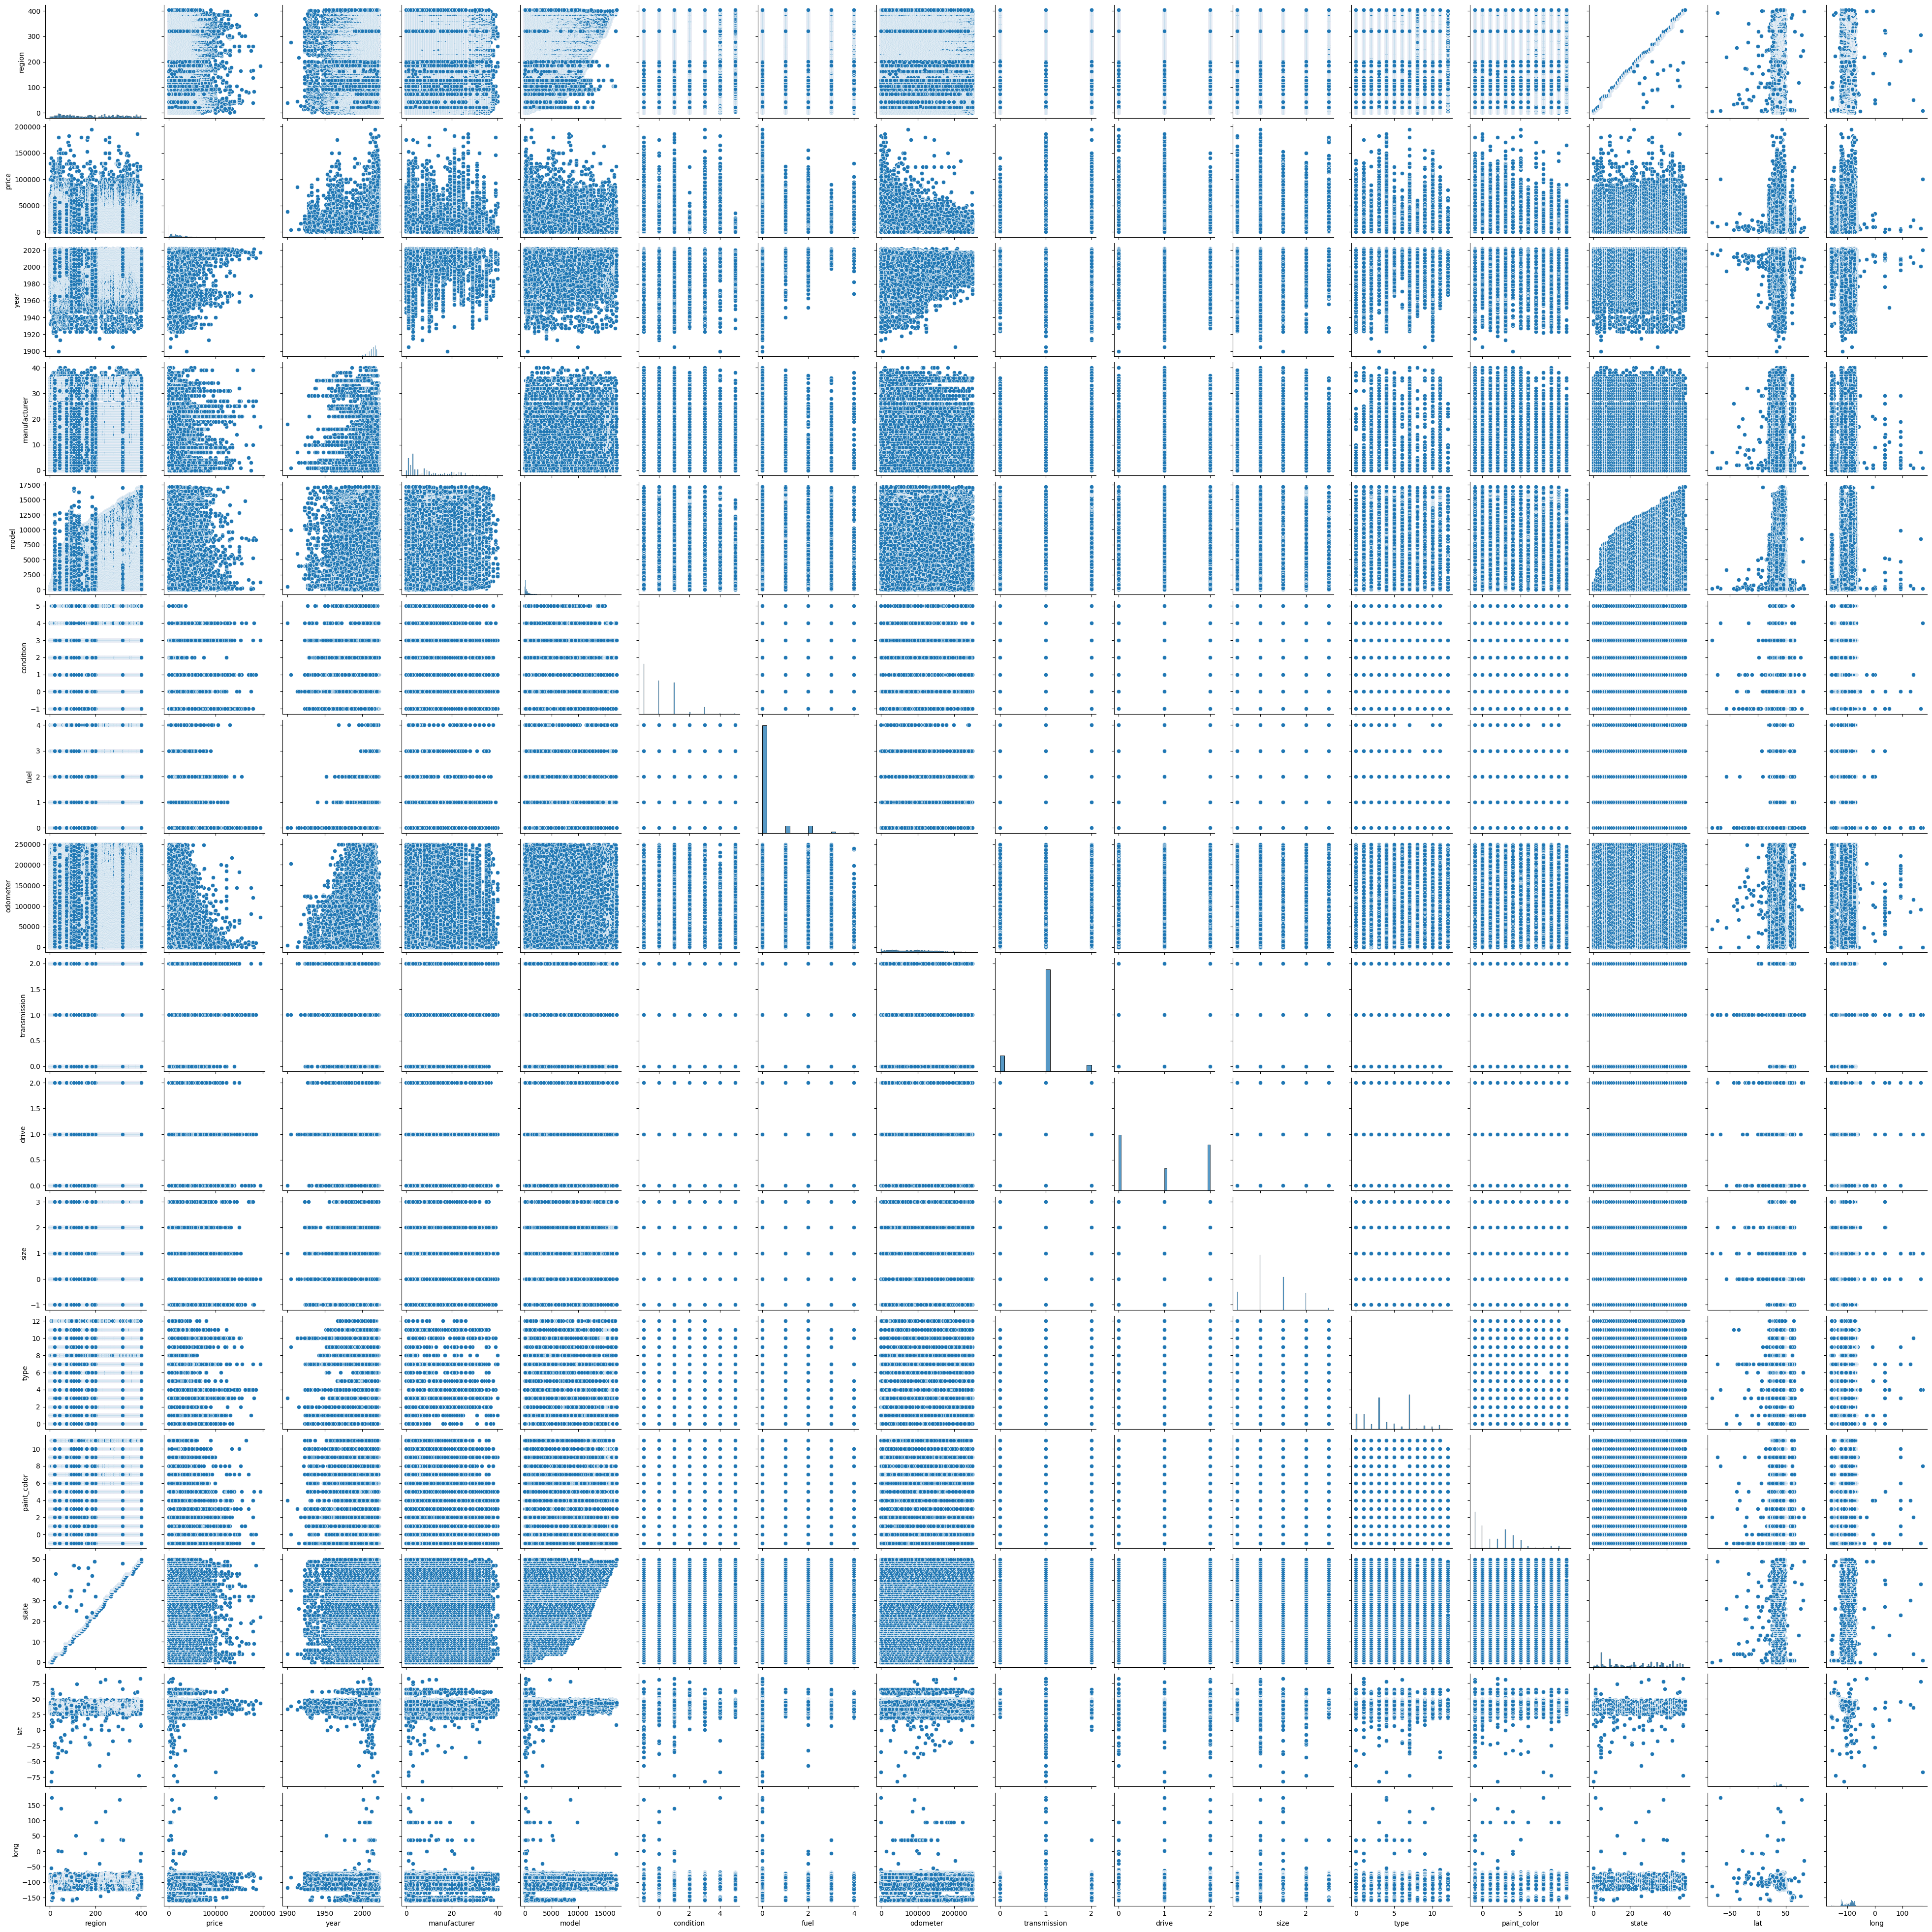

In [38]:
sns.pairplot(data = df_clean)